In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('/home/mao/Desktop/pima-indians-diabetes.data.csv', header=None, names=['Number of times pregnant', 'Plasma glucose', 'Diastolic blood pressure',
                                                                                              'Triceps skinfold thickness', 'serum insulin', 'Body mass index',
                                                                                              'Diabetes pedigree function', 'Age', 'Class'])

In [3]:
dataset.head(2)

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [4]:
dataset.describe(include='all')

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


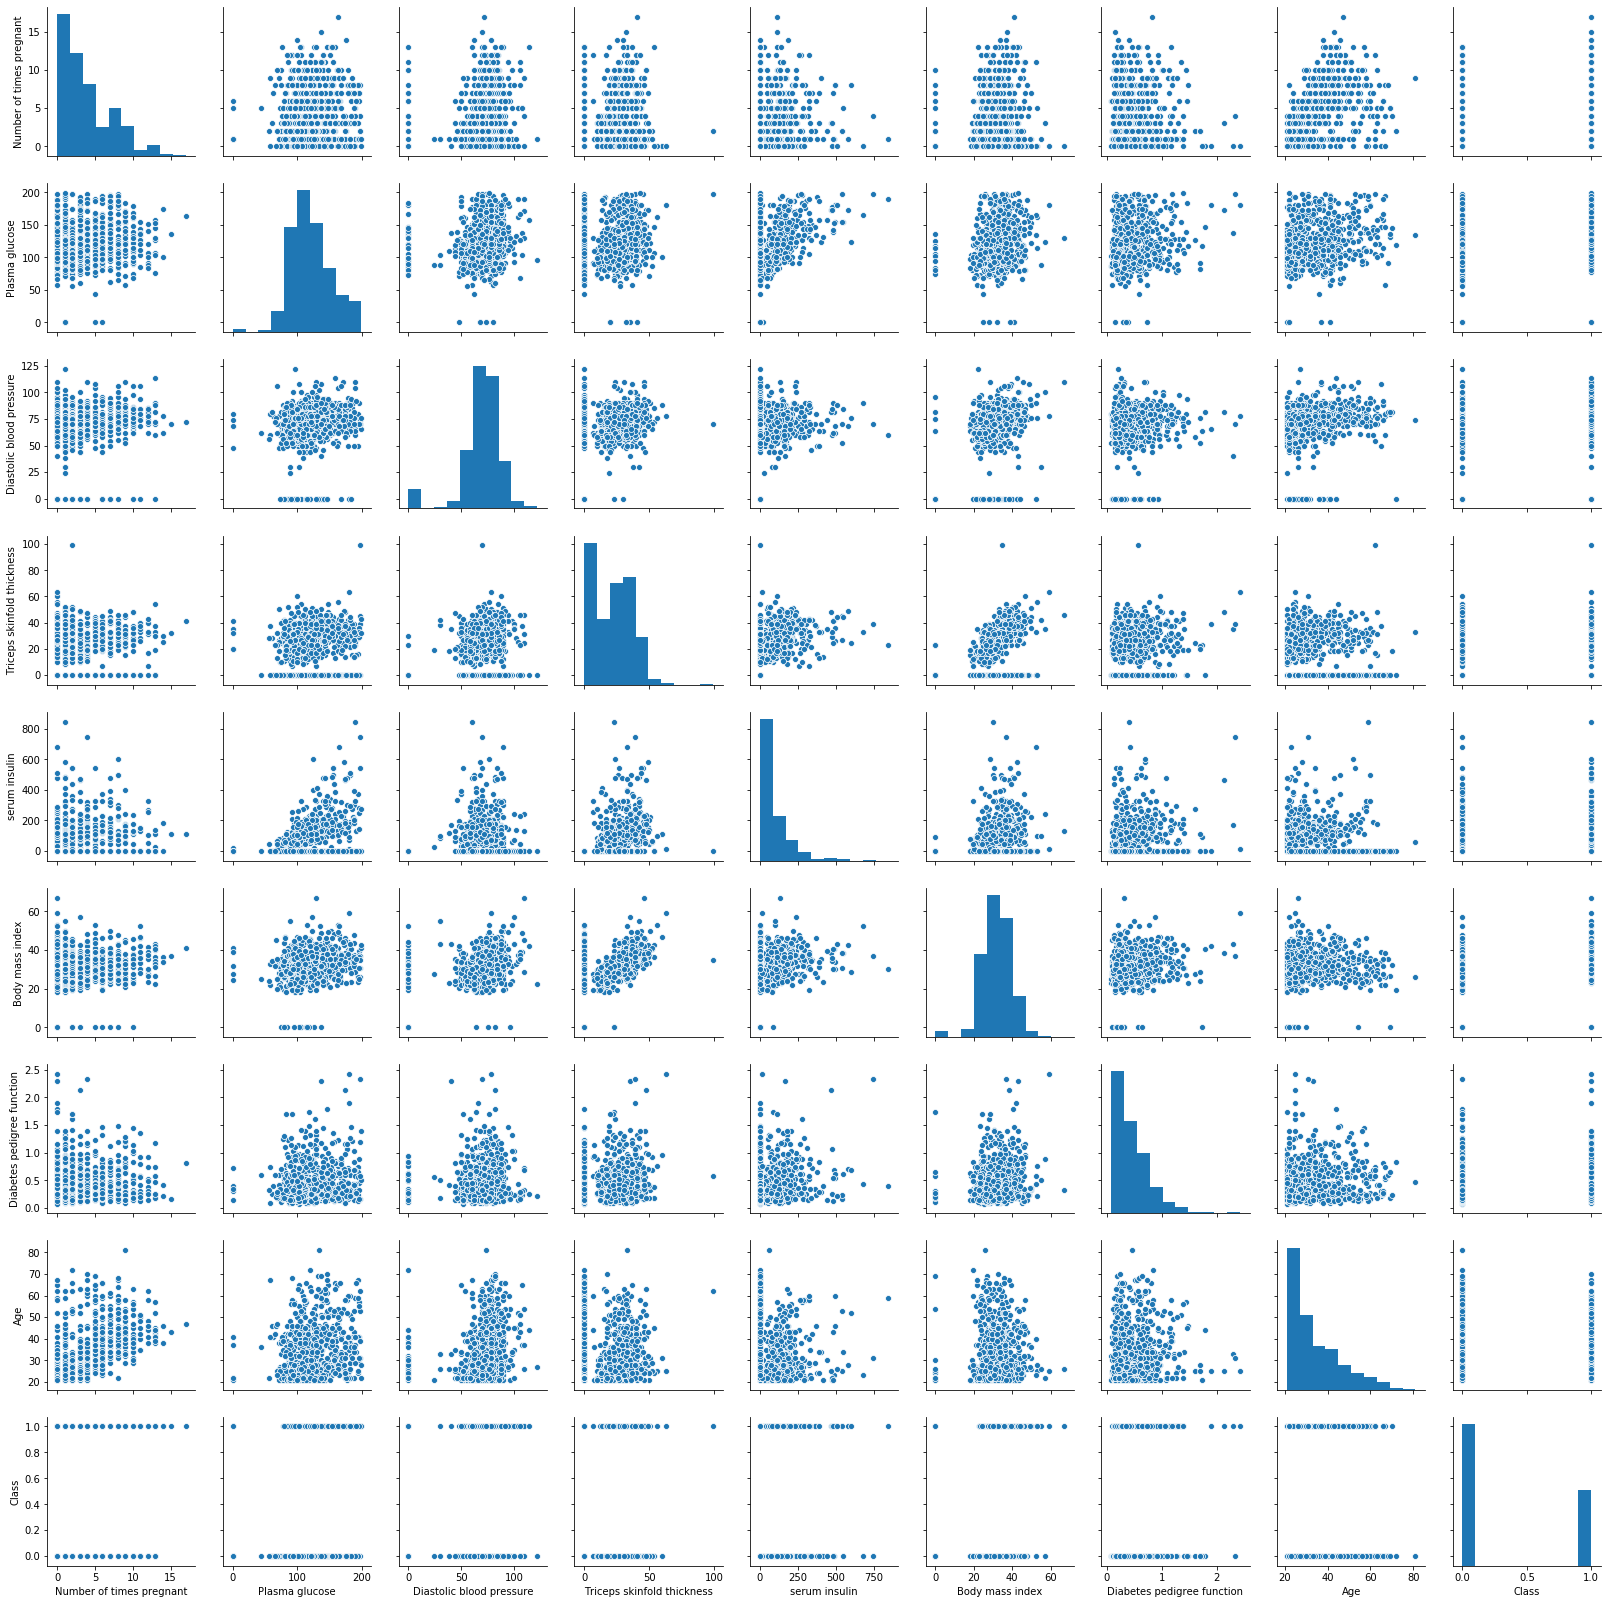

In [5]:
sns.pairplot(dataset)

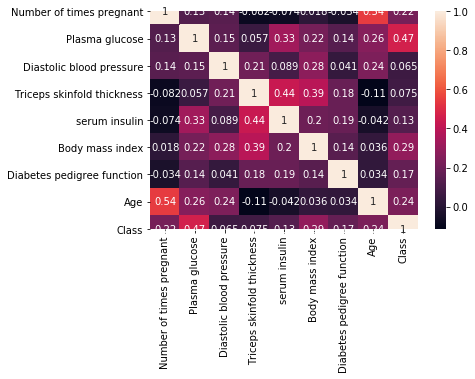

In [6]:
sns.heatmap(dataset.corr(), annot=True)

In [7]:
# creating input features and target variables
# X= dataset.iloc[:,[0,1,4,5,6,7]]
X = dataset.iloc[:, 0:8]
y= dataset.iloc[:,8]

In [8]:
X.head(2)

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [9]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
import tensorflow as tf

In [12]:
Sequential = tf.keras.Sequential
Dense = tf.keras.layers.Dense

In [13]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=8))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

W0814 18:52:34.504019 140625586136896 deprecation.py:506] From /home/mao/.virtualenvs/tf1/lib/python3.6/site-packages/tensorflow/python/keras/initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

W0814 18:52:34.574308 140625586136896 deprecation.py:323] From /home/mao/.virtualenvs/tf1/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
537/537 [==============================] - 0s 624us/sample - loss: 0.6894 - acc: 0.6462
Epoch 2/100
537/537 [==============================] - 0s 203us/sample - loss: 0.6780 - acc: 0.6462
Epoch 3/100
537/537 [==============================] - 0s 222us/sample - loss: 0.6488 - acc: 0.6462
Epoch 4/100
537/537 [==============================] - 0s 212us/sample - loss: 0.6011 - acc: 0.6462
Epoch 5/100
537/537 [==============================] - 0s 195us/sample - loss: 0.5628 - acc: 0.6462
Epoch 6/100
537/537 [==============================] - 0s 202us/sample - loss: 0.5422 - acc: 0.6462
Epoch 7/100
537/537 [==============================] - 0s 189us/sample - loss: 0.5324 - acc: 0.6462
Epoch 8/100
537/537 [==============================] - 0s 201us/sample - loss: 0.5265 - acc: 0.6462
Epoch 9/100
537/537 [==============================] - 0s 200us/sample - loss: 0.5216 - acc: 0.6462
Epoch 10/100
537/537 [==============================] - 0s 195us/sample - loss: 0.5176 - acc: 0.6462

537/537 [==============================] - 0s 198us/sample - loss: 0.4686 - acc: 0.7803
Epoch 83/100
537/537 [==============================] - 0s 193us/sample - loss: 0.4685 - acc: 0.7877
Epoch 84/100
537/537 [==============================] - 0s 189us/sample - loss: 0.4687 - acc: 0.7858
Epoch 85/100
537/537 [==============================] - 0s 191us/sample - loss: 0.4682 - acc: 0.7877
Epoch 86/100
537/537 [==============================] - 0s 181us/sample - loss: 0.4683 - acc: 0.7914
Epoch 87/100
537/537 [==============================] - 0s 202us/sample - loss: 0.4677 - acc: 0.7858
Epoch 88/100
537/537 [==============================] - 0s 217us/sample - loss: 0.4684 - acc: 0.7858
Epoch 89/100
537/537 [==============================] - 0s 219us/sample - loss: 0.4671 - acc: 0.7914
Epoch 90/100
537/537 [==============================] - 0s 208us/sample - loss: 0.4675 - acc: 0.7896
Epoch 91/100
537/537 [==============================] - 0s 196us/sample - loss: 0.4669 - acc: 0.7896
Epo

In [16]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

537/537 [==============================] - 0s 78us/sample - loss: 0.4630 - acc: 0.7970


[0.462953833505872, 0.7970205]

In [17]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[125  28]
 [ 26  52]]
